**Agglomerative Hierarchical Clustering (AHC)**

In [ ]:
import pandas as pd

# memuat data
data = pd.read_csv('data.csv')
data = data.drop(index=20)

In [ ]:
# eksplorasi data
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      27 non-null     int64  
 1   x2      27 non-null     float64
 2   x3      27 non-null     int64  
 3   x4      27 non-null     int64  
 4   x5      27 non-null     int64  
 5   x6      27 non-null     int64  
 6   x7      27 non-null     int64  
 7   x8      27 non-null     float64
 8   x9      27 non-null     float64
 9   x10     27 non-null     float64
dtypes: float64(4), int64(6)
memory usage: 2.2 KB
None
                  x1         x2           x3          x4         x5  \
count      27.000000  27.000000    27.000000   27.000000  27.000000   
mean    31921.962963   6.030370   292.111111   41.148148   7.222222   
std     25808.288972   4.039532   443.487606   54.014032   7.428290   
min      2831.000000   1.280000    12.000000    1.000000   1.000000   
25%     16734.500000   3.090000    94.00000

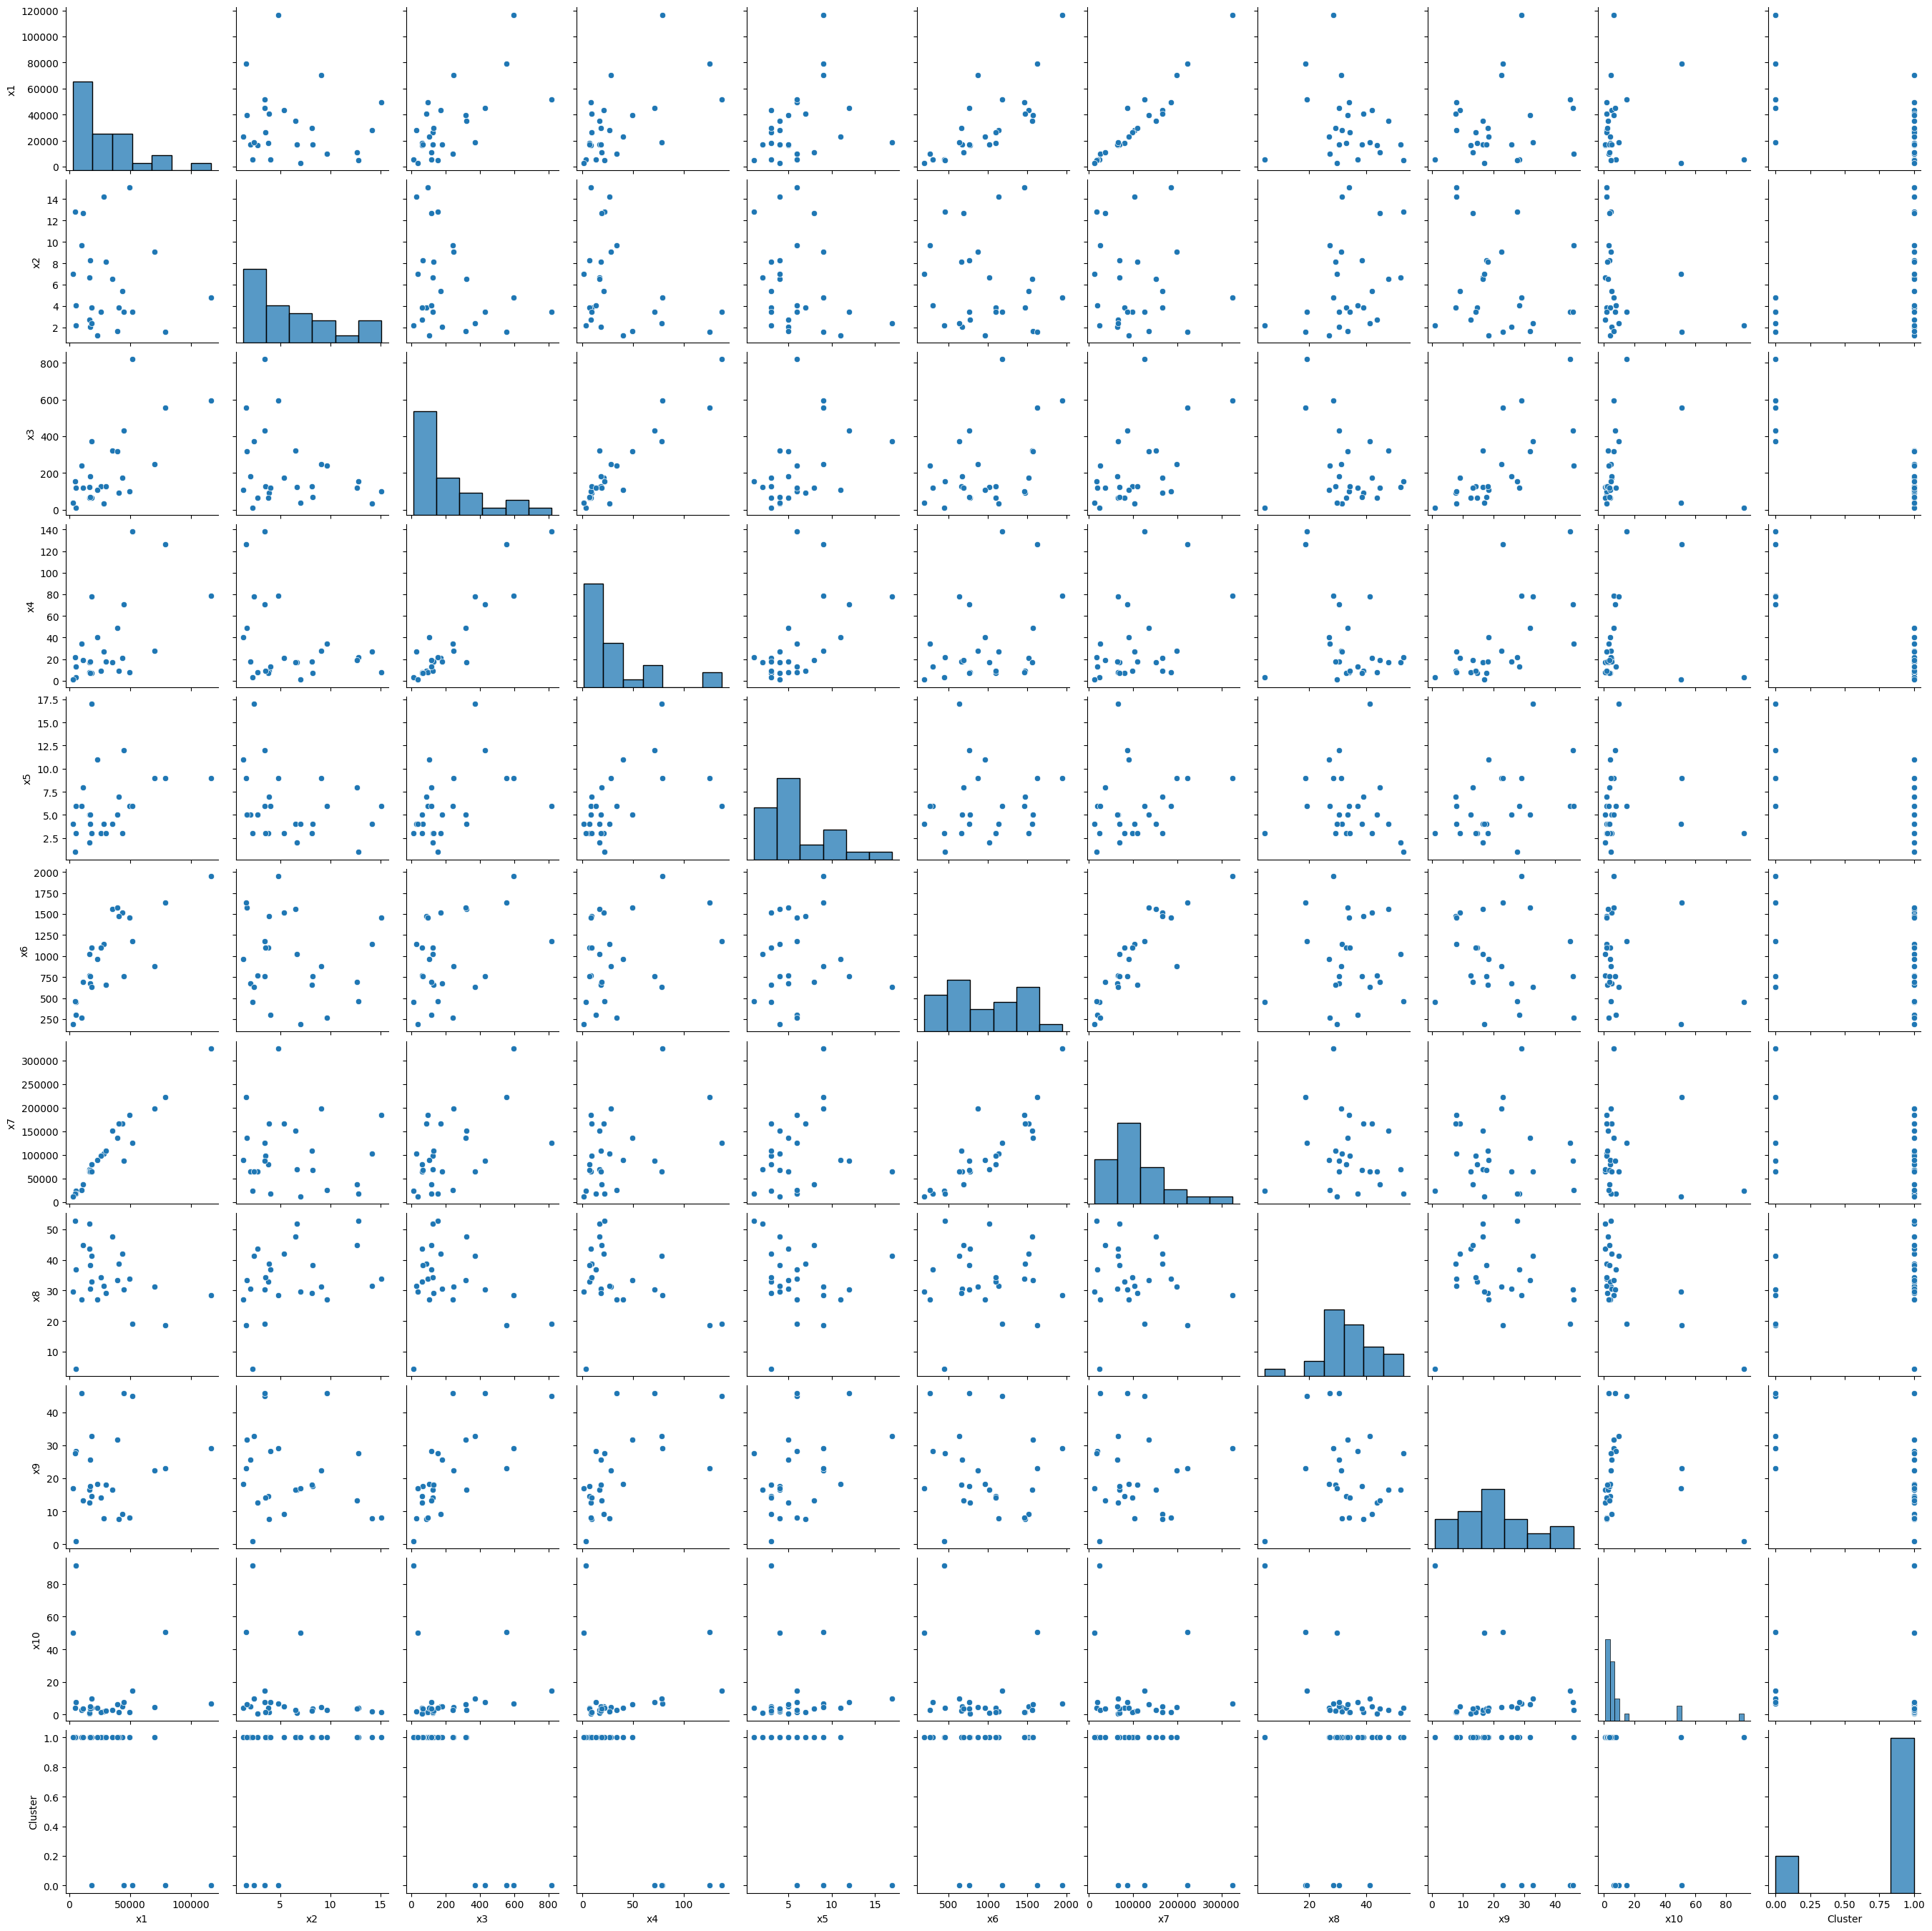

In [ ]:
# Visualisasi pair plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()

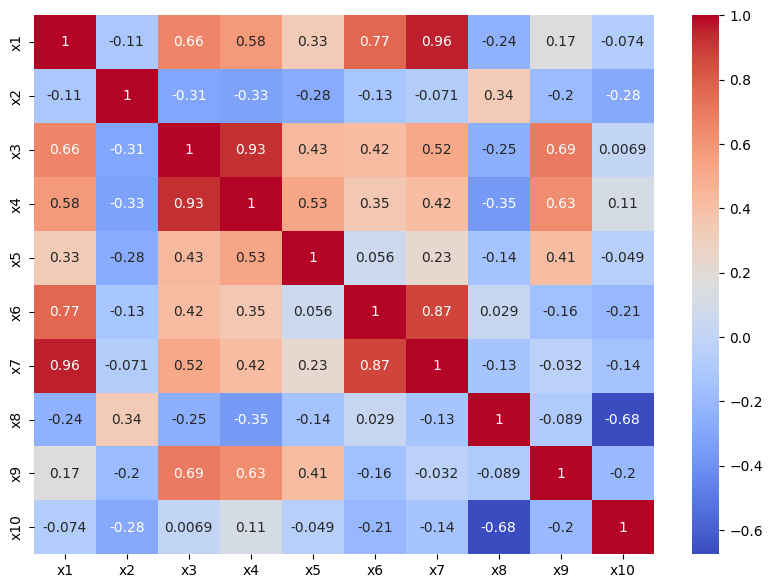

In [ ]:
# Heatmap Korelasi
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Mengubah array hasil standarisasi menjadi DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Menambahkan kembali indeks jika diperlukan
scaled_df.index = data.index

scaled_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Cluster
0,3.295667,-0.305788,1.955079,1.279067,0.867504,2.113590,3.032275,-0.522941,0.670145,-0.235480,-2.04939
1,0.463424,-0.154751,-0.217933,-0.345898,-0.845541,1.179295,0.847521,0.793969,-1.017836,-0.321830,0.48795
2,0.358019,-0.531106,-0.644316,-0.682097,0.296489,1.093185,0.853631,0.481662,-1.139377,-0.477357,0.48795
3,1.495550,0.753948,0.162215,-0.149781,0.867504,-0.198467,1.297204,-0.258979,0.111734,-0.339983,0.48795
4,0.695657,2.251939,-0.603219,-0.710114,0.010981,1.058741,1.104837,0.005950,-1.120678,-0.484226,0.48795
5,-0.132760,2.026621,-0.942271,-0.177798,-0.560034,0.369860,-0.015048,-0.228038,-1.130028,-0.463620,0.48795
6,-0.584186,-0.810896,-0.783019,-0.710114,-0.274526,-0.420201,-0.538133,0.944804,-0.719507,-0.518079,0.48795
7,-0.572893,0.157227,-0.464516,-0.457964,-1.131049,0.117987,-0.479129,1.743459,-0.393130,-0.513172,0.48795
8,0.139175,0.125039,0.542364,-0.457964,-0.560034,1.274016,0.646674,1.343165,-0.388030,-0.426332,0.48795
9,-0.520850,-0.538534,-0.783019,-0.738131,-0.845541,0.281597,-0.330888,-0.088806,-0.550369,-0.349795,0.48795


In [ ]:
from sklearn.decomposition import PCA
# PCA untuk mengurangi dimensi data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
pca_result = pd.DataFrame(pca_result)
pca_result

,0,1
0,5.412415,-2.244047
1,-0.284437,-2.002337
2,-0.268268,-1.713819
3,0.882841,-1.104076
4,-0.554120,-2.528164
5,-1.386204,-1.339710
6,-1.582291,-0.150036
7,-1.637958,-0.935041
8,-0.079700,-1.886033
9,-1.317671,-0.328823


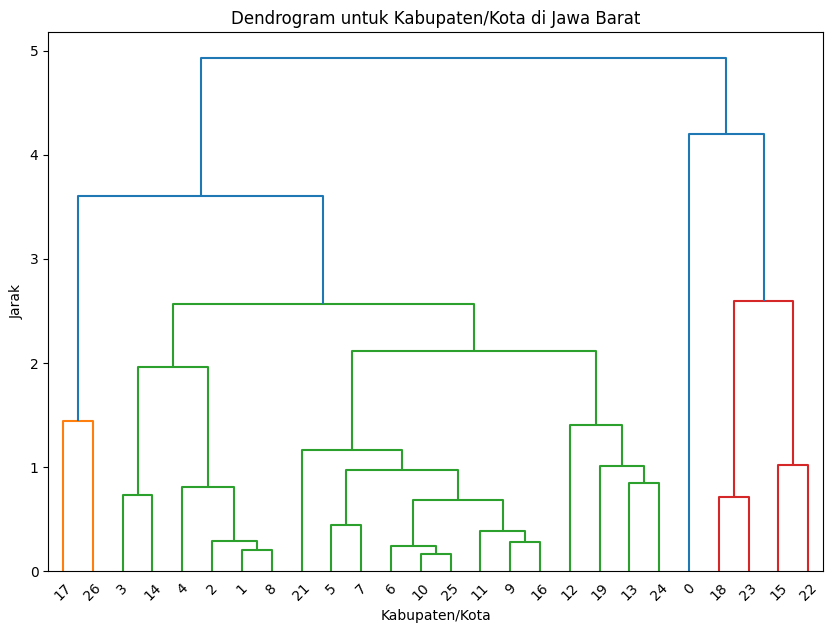

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrogram untuk Kabupaten/Kota di Jawa Barat")
dend = shc.dendrogram(shc.linkage(pca_result, method='average'), labels=data.index)
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jarak')
plt.show()

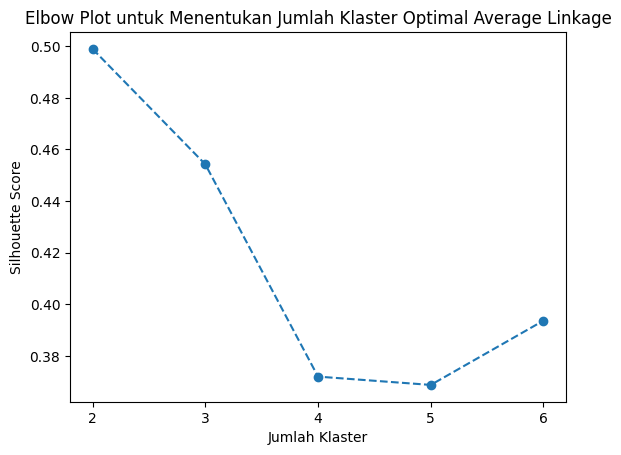

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# List untuk menyimpan nilai silhouette
silhouette_scores = []

# Mencoba jumlah klaster dari 2 hingga maksimum jumlah klaster yang diinginkan
for n_clusters in range(2, 7):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    labels = model.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, labels)
    silhouette_scores.append(silhouette_avg)

# Visualisasi Elbow Plot
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.title('Elbow Plot untuk Menentukan Jumlah Klaster Optimal Average Linkage')
plt.xticks(np.arange(2, 7, 1))  # Menetapkan ticks sumbu x setiap 1 unit
plt.grid(False)
plt.show()

In [ ]:
# Model AHC dengan cluster optimal = 2
optimal_clusters = 2
model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='average')
model.fit(pca_result)
labels = model.labels_

# Menambahkan label cluster ke DataFrame
data['Cluster'] = labels

print(data)

        x1     x2   x3   x4  x5    x6      x7     x8     x9    x10  Cluster
0   116562   4.78  596   79   9  1950  325557  28.40  29.03   6.56        0
1    43583   5.39  173   21   3  1516  166079  42.02   9.17   4.80        1
2    40867   3.87   90    9   7  1476  166525  38.79   7.74   1.63        1
3    70178   9.06  247   28   9   876  198904  31.13  22.46   4.43        1
4    49567  15.11   98    8   6  1460  184862  33.87   7.96   1.49        1
5    28221  14.20   32   27   4  1140  103115  31.45   7.85   1.91        1
6    16589   2.74   63    8   5   773   64932  43.58  12.68   0.80        1
7    16880   6.65  125   17   2  1023   69239  51.84  16.52   0.90        1
8    35228   6.52  321   17   4  1560  151418  47.70  16.58   2.67        1
9    18221   3.84   63    7   3  1099   80060  32.89  14.67   4.23        1
10   17065   8.27   69    7   4   763   68149  38.32  17.64   3.57        1
11   26082   3.49  126    9   3  1101   97812  34.25  14.20   1.58        1
12   23013  

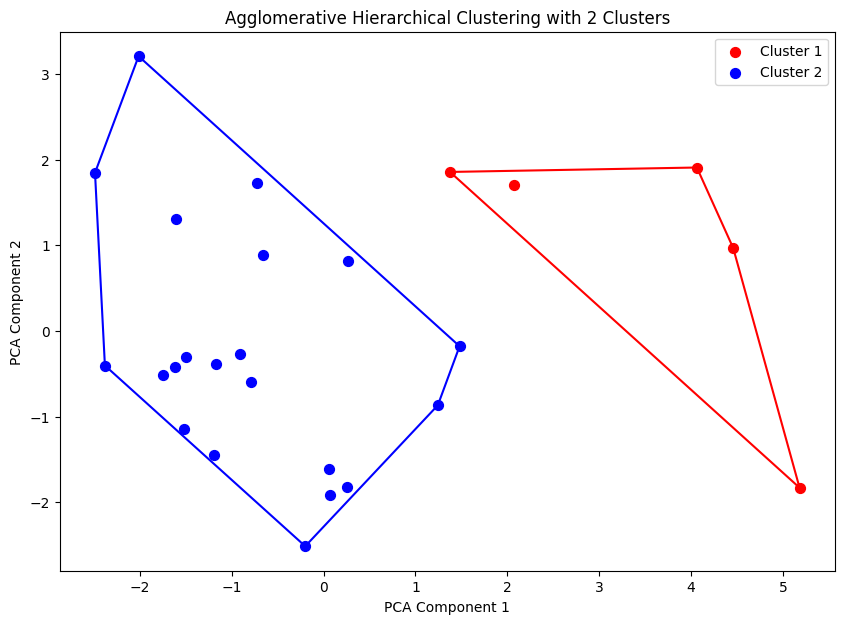

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
import numpy as np

# Plotting Cluster
plt.figure(figsize=(10, 7))

# Warna untuk setiap cluster
colors = ['red', 'blue']

for i in range(optimal_clusters):
    points = pca_result[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=50, color=colors[i], label=f'Cluster {i+1}')

    # Membuat shape yang membungkus cluster menggunakan ConvexHull
    if points.shape[0] > 2:  # ConvexHull membutuhkan minimal 3 titik
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], colors[i])

# Menambahkan keterangan pada plot
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Hierarchical Clustering with 2 Clusters')
plt.legend()
plt.show()

In [ ]:
# Menampilkan jumlah observasi di setiap kluster
cluster_counts = data['Cluster'].value_counts().sort_index()
print("Jumlah observasi di setiap kluster:")
print(cluster_counts)

Jumlah observasi di setiap kluster:
Cluster
0     5
1    21
Name: count, dtype: int64


In [ ]:
# Menghitung rata-rata nilai untuk setiap kluster
cluster_means = data.groupby('Cluster').mean()
print("Rata-rata nilai untuk setiap kluster:")
print(cluster_means)

Rata-rata nilai untuk setiap kluster:
                  x1        x2         x3         x4         x5           x6  \
Cluster                                                                        
0        62105.80000  3.140000  555.20000  98.400000  10.600000  1231.000000   
1        24388.52381  6.699524  134.52381  17.857143   4.857143   905.619048   

                    x7         x8     x9        x10  
Cluster                                              
0        165028.600000  27.540000  35.07  17.776000  
1         89733.666667  35.300952  17.83   9.831905  


In [ ]:
from sklearn.metrics import silhouette_score

# Evaluasi dengan Silhouette Score
sil_score = silhouette_score(pca_result, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.4989614129862578


**DBSCAN**

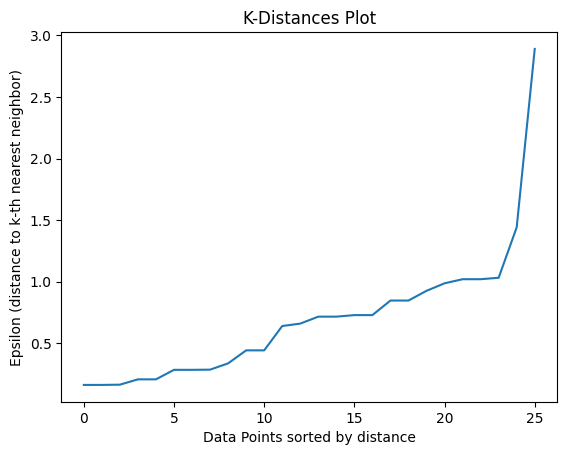

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Menentukan k sebagai MinPts
k = 5

# Menghitung jarak k-nearest neighbors
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(pca_result)
distances, indices = neighbors_fit.kneighbors(pca_result)

# Mengambil jarak k-nearest neighbors
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Membuat plot K-Distances
plt.plot(distances)
plt.title('K-Distances Plot')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (distance to k-th nearest neighbor)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Range nilai epsilon yang akan dieksplorasi
epsilon_range = np.linspace(1.0, 5.0, 50)

best_score = -1
best_epsilon = None
best_labels = None

for epsilon in epsilon_range:
    dbscan = DBSCAN(eps=epsilon, min_samples=10)
    cluster_labels = dbscan.fit_predict(pca_result)

    # Hanya evaluasi jika terdapat lebih dari satu cluster yang terbentuk
    if len(set(cluster_labels)) > 1:
        silhouette = silhouette_score(pca_result, cluster_labels)
        davies_bouldin = davies_bouldin_score(pca_result, cluster_labels)

        # Anda bisa juga menggunakan metrik lainnya

        # Jika ingin mencari nilai epsilon dengan Silhouette Score tertinggi
        # if silhouette > best_score:
        # Jika ingin mencari nilai epsilon dengan Davies-Bouldin Index terendah
        if davies_bouldin > best_score:
            best_score = davies_bouldin
            best_epsilon = epsilon
            best_labels = cluster_labels

print("Epsilon terbaik:", best_epsilon)
print("Davies-Bouldin Index terbaik:", best_score)


Epsilon terbaik: 1.4081632653061225
Davies-Bouldin Index terbaik: 1.4190874303902625


In [ ]:
# Range nilai epsilon yang akan dieksplorasi
epsilon_range = np.linspace(1.0, 5.0, 50)

best_score = -1
best_epsilon = None
best_labels = None

for epsilon in epsilon_range:
    dbscan = DBSCAN(eps=epsilon, min_samples=2)
    cluster_labels = dbscan.fit_predict(pca_result)

    if len(set(cluster_labels)) > 1:
        silhouette = silhouette_score(pca_result, cluster_labels)

        if silhouette > best_score:
            best_score = silhouette
            best_epsilon = epsilon
            best_labels = cluster_labels

print("Epsilon terbaik:", best_epsilon)
print("Silhouette Score terbaik:", best_score)

Epsilon terbaik: 1.5714285714285714
Silhouette Score terbaik: 0.48222931068061914


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Pemodelan dengan DBSCAN menggunakan parameter terbaik yang ditemukan
dbscan = DBSCAN(eps=best_epsilon, min_samples=2)
cluster_labels = dbscan.fit_predict(pca_result)

# Menambahkan label kluster ke DataFrame asli
data['Cluster'] = cluster_labels

print(data)

        x1     x2   x3   x4  x5    x6      x7     x8     x9    x10  Cluster
0   116562   4.78  596   79   9  1950  325557  28.40  29.03   6.56       -1
1    43583   5.39  173   21   3  1516  166079  42.02   9.17   4.80        0
2    40867   3.87   90    9   7  1476  166525  38.79   7.74   1.63        0
3    70178   9.06  247   28   9   876  198904  31.13  22.46   4.43        0
4    49567  15.11   98    8   6  1460  184862  33.87   7.96   1.49        0
5    28221  14.20   32   27   4  1140  103115  31.45   7.85   1.91        0
6    16589   2.74   63    8   5   773   64932  43.58  12.68   0.80        0
7    16880   6.65  125   17   2  1023   69239  51.84  16.52   0.90        0
8    35228   6.52  321   17   4  1560  151418  47.70  16.58   2.67        0
9    18221   3.84   63    7   3  1099   80060  32.89  14.67   4.23        0
10   17065   8.27   69    7   4   763   68149  38.32  17.64   3.57        0
11   26082   3.49  126    9   3  1101   97812  34.25  14.20   1.58        0
12   23013  

In [ ]:
# Menampilkan jumlah observasi di setiap kluster
cluster_counts_db = data['Cluster'].value_counts().sort_index()
print("Jumlah observasi di setiap kluster:")
print(cluster_counts_db)

Jumlah observasi di setiap kluster:
Cluster
-1     1
 0    23
 1     2
Name: count, dtype: int64


In [ ]:
# Menghitung rata-rata nilai untuk setiap kluster
cluster_means = data.groupby('Cluster').mean()
print("Rata-rata nilai untuk setiap kluster:")
print(cluster_means)

Rata-rata nilai untuk setiap kluster:
                    x1        x2          x3          x4        x5  \
Cluster                                                              
-1       116562.000000  4.780000  596.000000   79.000000  9.000000   
 0        25020.652174  6.372609  157.826087   22.782609  5.695652   
 1        65325.500000  2.520000  687.500000  132.000000  7.500000   

                  x6             x7         x8         x9        x10  
Cluster                                                               
-1       1950.000000  325557.000000  28.400000  29.030000   6.560000  
 0        887.521739   88563.826087  35.344348  19.694348   9.718696  
 1       1405.000000  173512.500000  18.850000  33.890000  32.630000  


In [ ]:
# Menentukan jumlah cluster yang ditemukan oleh DBSCAN
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
num_noise_points = list(cluster_labels).count(-1)

print("Jumlah Cluster:", num_clusters)
print("Jumlah Noise Points:", num_noise_points)

Jumlah Cluster: 1
Jumlah Noise Points: 3


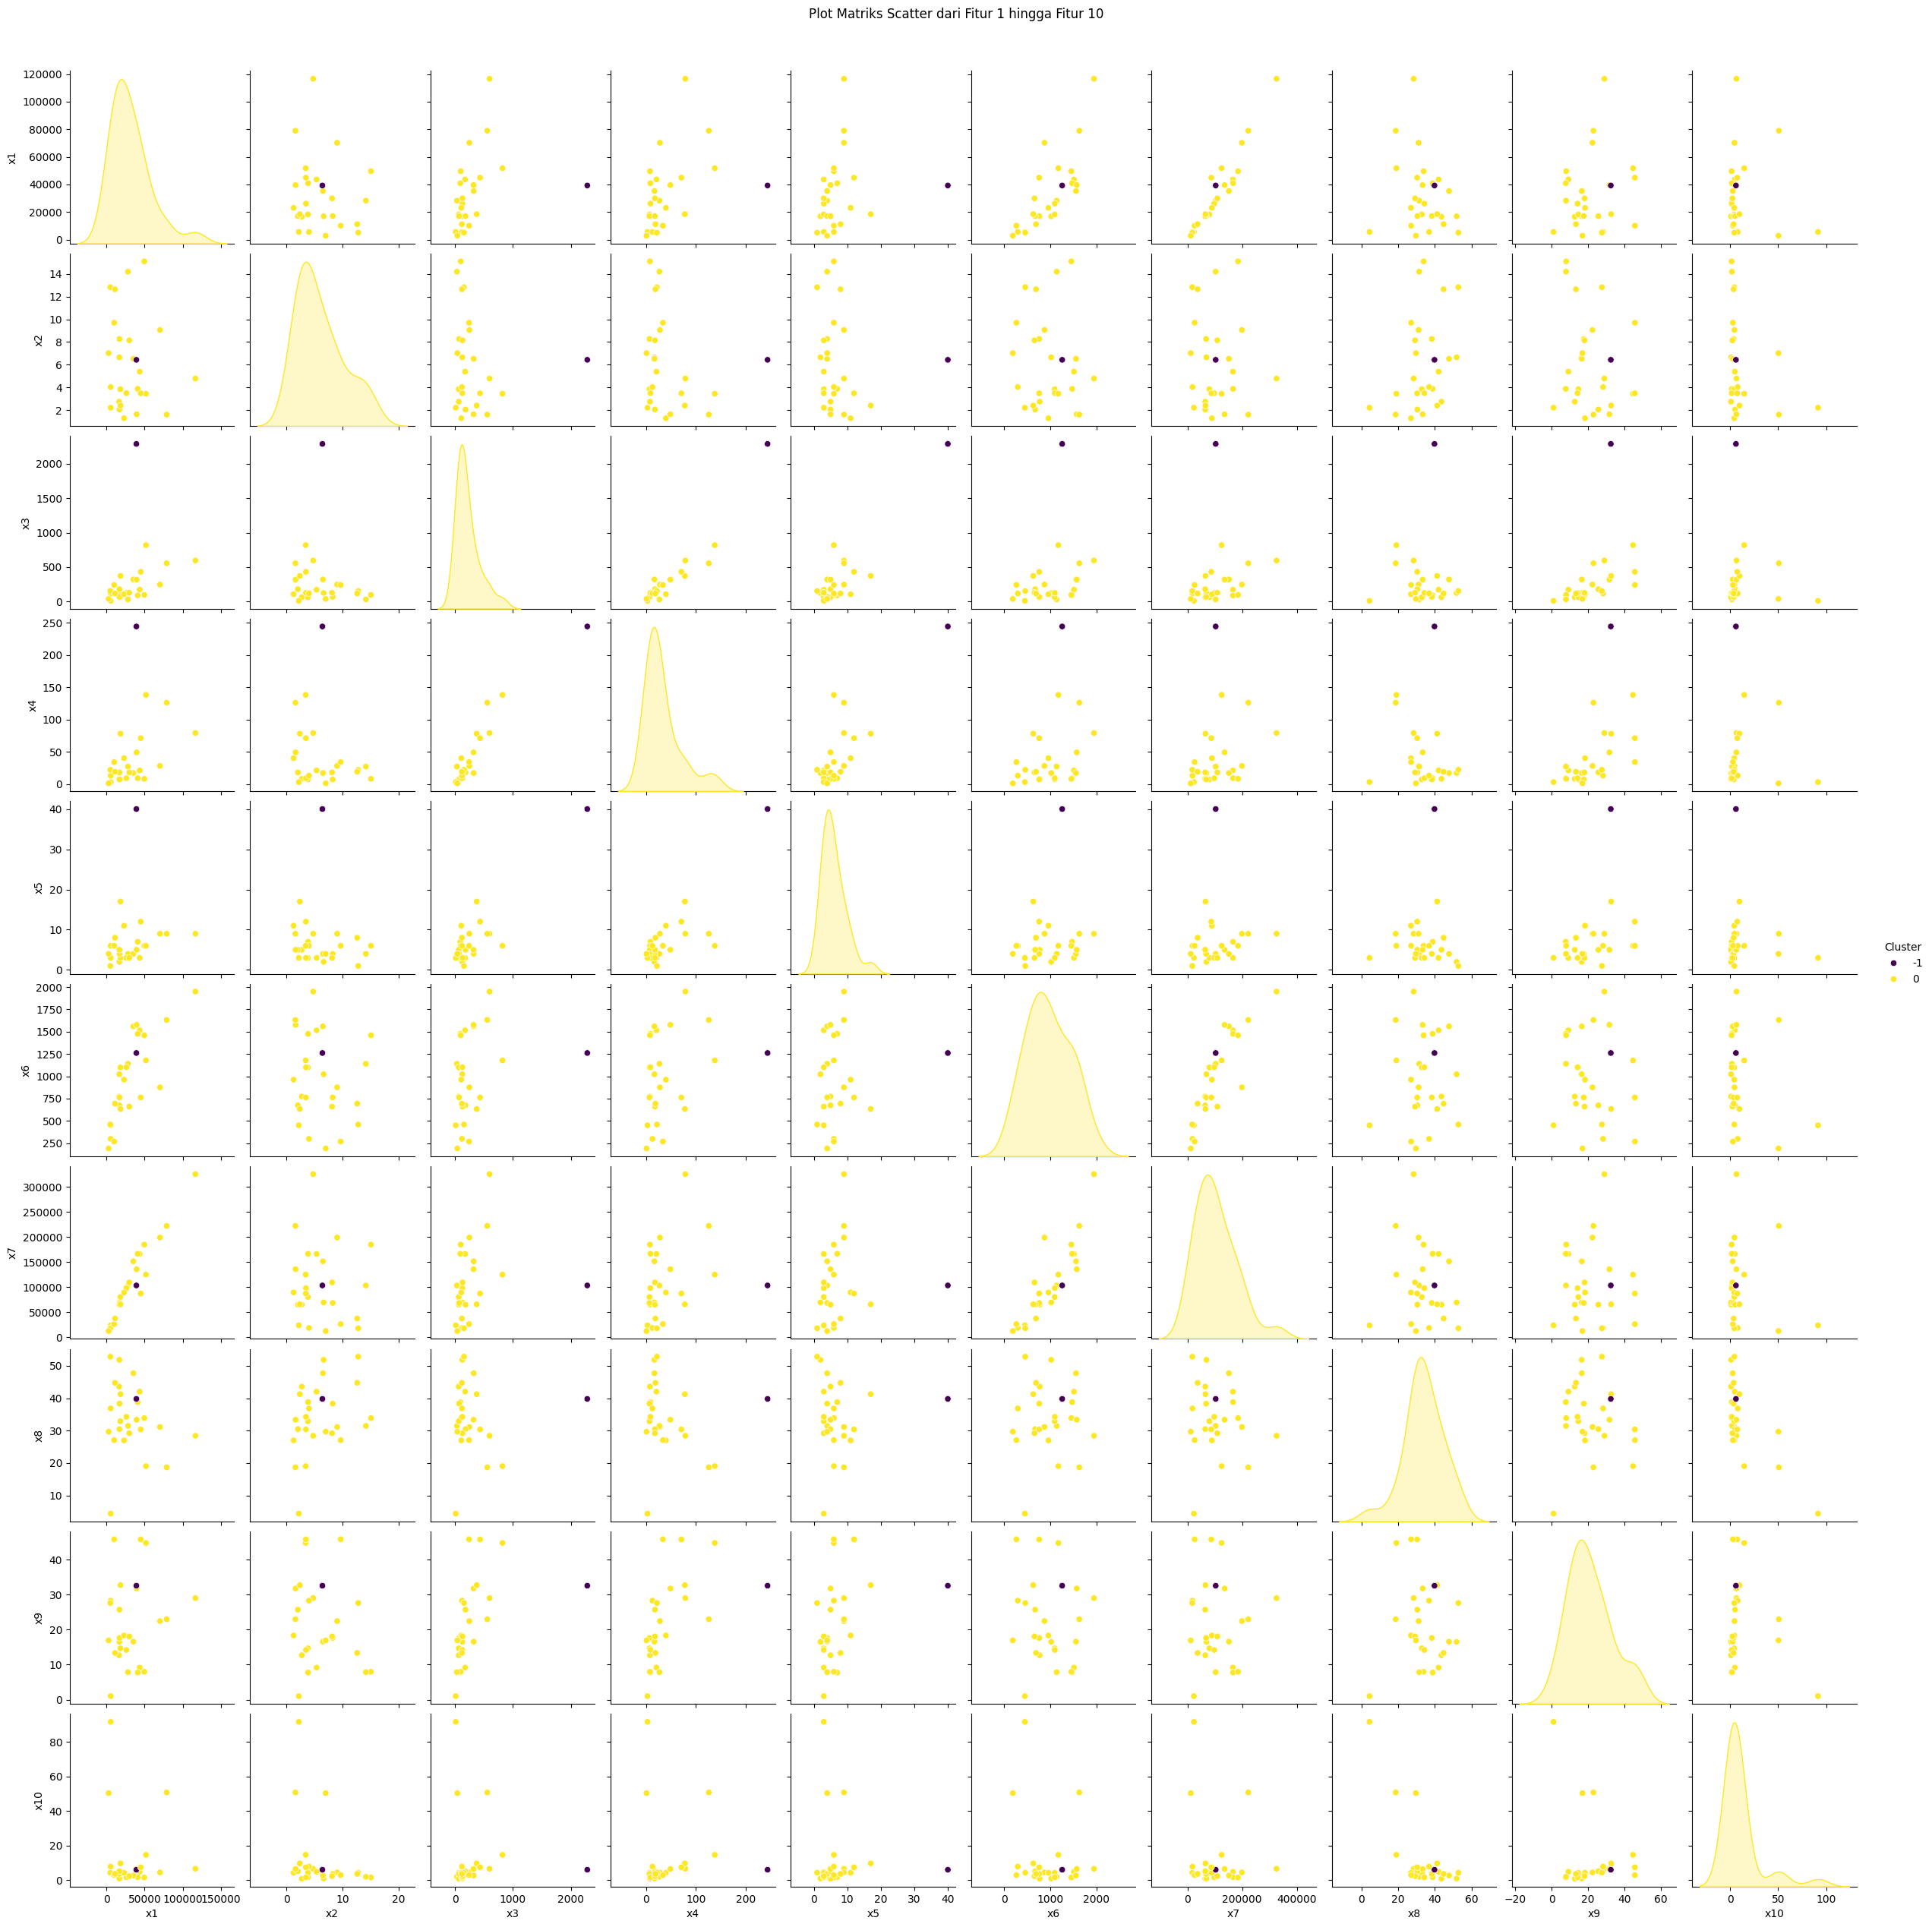

In [ ]:
import seaborn as sns

# Menambahkan label kluster ke DataFrame sample_data
data['Cluster'] = cluster_labels[data.index]

# Plot matriks scatter
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.suptitle('Plot Matriks Scatter dari Fitur 1 hingga Fitur 10', y=1.02)
plt.show()
